In [ ]:
!pip install networkx memory-profiler

In [ ]:
import heapq
import random
import time
import math
import matplotlib.pyplot as plt

# Graph Generator (Sparse)

def generate_sparse_graph(n, m, max_w=10):
    graph = {i: [] for i in range(n)}
    edges = 0

    for i in range(1, n):
        u = random.randint(0, i - 1)
        w = random.randint(1, max_w)
        graph[u].append((i, w))
        edges += 1

    while edges < m:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        w = random.randint(1, max_w)
        graph[u].append((v, w))
        edges += 1

    return graph

# Dijkstra

def dijkstra(graph, source):
    dist = {v: float('inf') for v in graph}
    dist[source] = 0
    pq = [(0, source)]
    relax = 0

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in graph[u]:
            relax += 1
            nd = d + w
            if nd < dist[v]:
                dist[v] = nd
                heapq.heappush(pq, (nd, v))
    return dist, relax

# BTB-like Approximate

def btb_like(graph, source, BOUND):
    dist = {v: float('inf') for v in graph}
    dist[source] = 0
    pq = [(0, source)]
    relax = 0
    visited = set()

    while pq:
        d, u = heapq.heappop(pq)
        if d > BOUND or u in visited:
            continue
        visited.add(u)

        for v, w in graph[u]:
            relax += 1
            nd = d + w
            if nd < dist[v] and nd <= BOUND:
                dist[v] = nd
                heapq.heappush(pq, (nd, v))

    return dist, relax


# Experiment Runner

node_sizes = [500, 1000, 2000, 3000]

dij_time, btb_time = [], []
dij_relax, btb_relax = [], []
dij_reach, btb_reach = [], []

for n in node_sizes:
    m = n * 4
    graph = generate_sparse_graph(n, m)
    source = 0

    # Dijkstra
    t0 = time.time()
    dij_dist, dr = dijkstra(graph, source)
    t1 = time.time()

    finite = [d for d in dij_dist.values() if math.isfinite(d)]
    BOUND = sorted(finite)[int(0.3 * len(finite))]

    # BTB
    t2 = time.time()
    btb_dist, br = btb_like(graph, source, BOUND)
    t3 = time.time()

    dij_time.append(t1 - t0)
    btb_time.append(t3 - t2)
    dij_relax.append(dr)
    btb_relax.append(br)
    dij_reach.append(sum(math.isfinite(d) for d in dij_dist.values()))
    btb_reach.append(sum(math.isfinite(d) for d in btb_dist.values()))


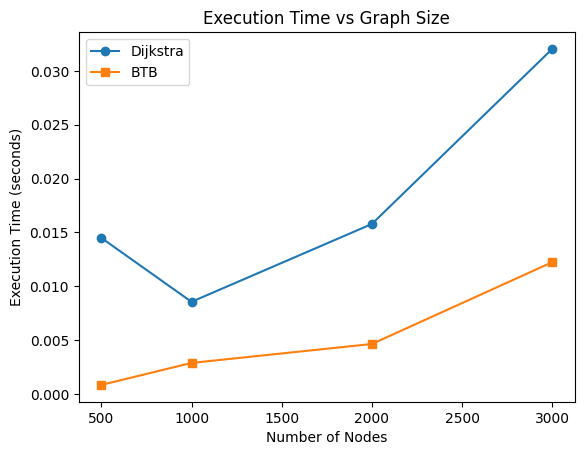

In [ ]:
plt.figure()
plt.plot(node_sizes, dij_time, marker='o', label="Dijkstra")
plt.plot(node_sizes, btb_time, marker='s', label="BTB")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Graph Size")
plt.legend()
plt.show()


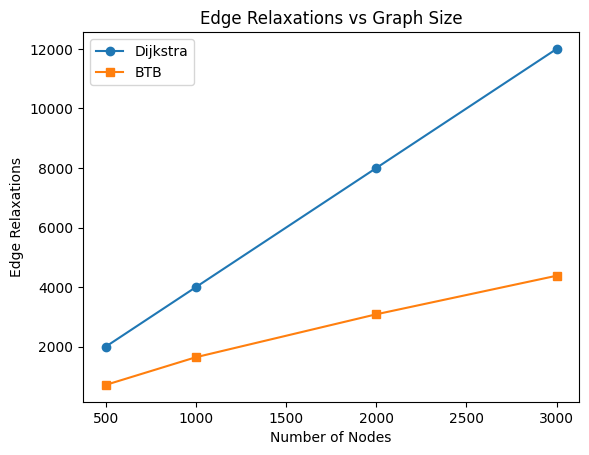

In [ ]:
plt.figure()
plt.plot(node_sizes, dij_relax, marker='o', label="Dijkstra")
plt.plot(node_sizes, btb_relax, marker='s', label="BTB")
plt.xlabel("Number of Nodes")
plt.ylabel("Edge Relaxations")
plt.title("Edge Relaxations vs Graph Size")
plt.legend()
plt.show()


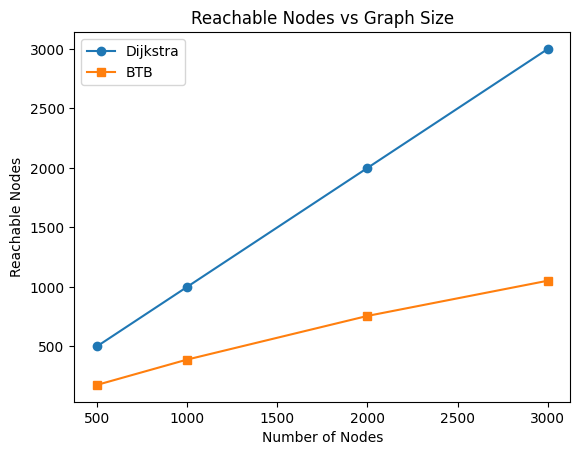

In [ ]:
plt.figure()
plt.plot(node_sizes, dij_reach, marker='o', label="Dijkstra")
plt.plot(node_sizes, btb_reach, marker='s', label="BTB")
plt.xlabel("Number of Nodes")
plt.ylabel("Reachable Nodes")
plt.title("Reachable Nodes vs Graph Size")
plt.legend()
plt.show()


Visualizing Results via Gradio

In [7]:
import heapq
import random
import time
import math
import matplotlib.pyplot as plt
import gradio as gr

# Graph Generator (Sparse)
def generate_sparse_graph(n, m, max_w=10):
    graph = {i: [] for i in range(n)}
    edges = 0

    for i in range(1, n):
        u = random.randint(0, i - 1)
        w = random.randint(1, max_w)
        graph[u].append((i, w))
        edges += 1

    while edges < m:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        w = random.randint(1, max_w)
        graph[u].append((v, w))
        edges += 1

    return graph

# Dijkstra

def dijkstra(graph, source):
    dist = {v: float('inf') for v in graph}
    dist[source] = 0
    pq = [(0, source)]
    relax = 0

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in graph[u]:
            relax += 1
            nd = d + w
            if nd < dist[v]:
                dist[v] = nd
                heapq.heappush(pq, (nd, v))
    return dist, relax

# BTB-like Approximate
def btb_like(graph, source, BOUND):
    dist = {v: float('inf') for v in graph}
    dist[source] = 0
    pq = [(0, source)]
    relax = 0
    visited = set()

    while pq:
        d, u = heapq.heappop(pq)
        if d > BOUND or u in visited:
            continue
        visited.add(u)

        for v, w in graph[u]:
            relax += 1
            nd = d + w
            if nd < dist[v] and nd <= BOUND:
                dist[v] = nd
                heapq.heappush(pq, (nd, v))

    return dist, relax

# Experiment Runner

def run_experiment(max_nodes):

    # Adaptive step size to avoid freezing
    if max_nodes <= 5000:
        step = 500
    elif max_nodes <= 20000:
        step = 2000
    else:
        step = 5000

    node_sizes = list(range(200, max_nodes + 1, step))

    dij_time, btb_time = [], []
    dij_relax, btb_relax = [], []

    for n in node_sizes:
        m = n * 4
        graph = generate_sparse_graph(n, m)
        source = 0

        # Dijkstra
        t0 = time.time()
        dij_dist, dr = dijkstra(graph, source)
        t1 = time.time()

        finite = [d for d in dij_dist.values() if math.isfinite(d)]
        BOUND = sorted(finite)[int(0.3 * len(finite))]

        # BTB
        t2 = time.time()
        _, br = btb_like(graph, source, BOUND)
        t3 = time.time()

        dij_time.append(t1 - t0)
        btb_time.append(t3 - t2)
        dij_relax.append(dr)
        btb_relax.append(br)

    # Plot 1: Execution Time
    plt.figure(figsize=(8, 4))
    plt.plot(node_sizes, dij_time, marker='o', label="Dijkstra")
    plt.plot(node_sizes, btb_time, marker='s', label="BTB")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Execution Time vs Graph Size")
    plt.legend()
    plt.tight_layout()
    fig1 = plt.gcf()
    plt.close()

    # Plot 2: Edge Relaxations

    plt.figure(figsize=(8, 4))
    plt.plot(node_sizes, dij_relax, marker='o', label="Dijkstra")
    plt.plot(node_sizes, btb_relax, marker='s', label="BTB")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Edge Relaxations")
    plt.title("Edge Relaxations vs Graph Size")
    plt.legend()
    plt.tight_layout()
    fig2 = plt.gcf()
    plt.close()

    return fig1, fig2

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## Dijkstra vs BTB-like Algorithm (Scalable Line Graph Analysis)")
    gr.Markdown(
        "**Note:** Higher node counts may take longer to execute. "
        "Graphs are sparse with average degree ≈ 4."
    )

    max_nodes = gr.Slider(
        minimum=200,
        maximum=50000,
        step=200,
        value=5000,
        label="Maximum Number of Nodes"
    )

    run_btn = gr.Button("Run Experiment")

    plot1 = gr.Plot(label="Execution Time vs Graph Size")
    plot2 = gr.Plot(label="Edge Relaxations vs Graph Size")

    run_btn.click(
        run_experiment,
        inputs=max_nodes,
        outputs=[plot1, plot2]
    )

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://972bdfda1819a81aac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
